Hello Jester!

My name is Dmitry.  I'm glad to review your work today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

**Comparing Surf and Ultimate Plans Revenue for Advertising Budget**

Purpose: to decide on which plan to invest more advertisement money on based on the plan that produces more in revenue.

Plan: take a random sample of 500 clients, determine their behavior and usage of their plan, and see which plan brings in a higher revenue.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great start with an introduction!
</div>

## Initialization

In [1]:
# Loading all the libraries
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st
import numpy as np
import pandas as pd


## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

In [3]:
calls.info()
internet.info()
messages.info()
plans.info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dty

## Plans

In [4]:
# Print the general/summary information about the plans' DataFrame
# Prints information about the plans including column names and their respective data type
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Print a sample of data for plans
# There are only two plans, so print shows all data in the dataset
display(plans)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

## Fix data

## Enrich data

## Users

In [6]:
# Print the general/summary information about the users' DataFrame
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Print a sample of data for users
display(users.sample(5))


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
344,1344,Hugo,Daugherty,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-25,surf,NaN
314,1314,Brice,Morgan,35,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-03-06,ultimate,NaN
105,1105,Micheal,Poole,57,"Providence-Warwick, RI-MA MSA",2018-01-08,surf,NaN
403,1403,Jae,Gardner,27,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-02-06,ultimate,NaN
132,1132,Edward,Roberts,39,"San Francisco-Oakland-Berkeley, CA MSA",2018-04-14,ultimate,NaN


Churn_date has missing dates. We could fill the missing cells with data such as today's date.

### Fix Data

In [8]:
# Add missing information to the users dataframe's 'churn_date' column
# Set to today's date.
users['churn_date'] = pd.to_datetime(users['churn_date']).fillna(pd.to_datetime('today'))
# Convert 'reg_date' and 'churn_date' columns into datetime type
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

### Enrich Data

## Calls

In [9]:
# Print the general/summary information about the calls' DataFrame

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Print a sample of data for calls
display(calls.sample(5))


,id,user_id,call_date,duration
93776,1335_4,1335,2018-12-11,8.38
18611,1071_453,1071,2018-12-14,7.56
92938,1334_306,1334,2018-08-12,4.96
35930,1136_43,1136,2018-12-13,7.96
14787,1060_169,1060,2018-12-11,4.32


Call duration needs to be rounded up to the next integer (minute).

### Fix data

In [11]:
# Convert 'call_date' column into datetime type
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

### Enrich data

In [12]:
# Round up each call duration into the next minute (1 second becomes 1 minute)
# Convert the duration column into integers since they're rounded to the next minute anyways
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)

print(calls)

              id  user_id  call_date  duration
0        1000_93     1000 2018-12-27         9
1       1000_145     1000 2018-12-27        14
2       1000_247     1000 2018-12-27        15
3       1000_309     1000 2018-12-28         6
4       1000_380     1000 2018-12-30         5
...          ...      ...        ...       ...
137730  1499_199     1499 2018-11-21         9
137731  1499_200     1499 2018-10-20        11
137732  1499_201     1499 2018-09-21         9
137733  1499_202     1499 2018-10-10         1
137734  1499_203     1499 2018-12-29        14

[137735 rows x 4 columns]


## Messages

In [13]:
# Print the general/summary information about the messages' DataFrame
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Print a sample of data for messages
display(messages.sample(5))


,id,user_id,message_date
8382,1061_388,1061,2018-12-09
18078,1119_702,1119,2018-10-23
56365,1356_36,1356,2018-10-29
25490,1154_73,1154,2018-10-15
15000,1101_57,1101,2018-08-14


message_date needs to be converted to datetime type.

### Fix data

In [15]:
# Convert 'message_date' column into datetime type
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Enrich data

## Internet

In [16]:
# Print the general/summary information about the internet DataFrame
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [17]:
# Print a sample of data for the internet traffic
display(internet.sample(5))


,id,user_id,session_date,mb_used
50187,1223_394,1223,2018-12-27,646.54
62067,1282_444,1282,2018-11-28,526.95
4022,1022_433,1022,2018-12-14,408.05
56693,1256_435,1256,2018-09-14,352.24
72106,1336_120,1336,2018-06-02,139.96


mb_used doesn't need to be changed or converted. Only session_date needs to be converted to datetime type.

### Fix data

In [18]:
# Convert 'session_date' column into datetime type
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enrich data

## Study plan conditions

In [19]:
# Print out the plan conditions and make sure they are clear for you
display(plans)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job.
</div>

## Aggregate data per user

In [20]:
# Calculate the number of calls made by each user per month. Save the result.
# Create a month column in the calls dataframe from the call_date column
calls['month'] = calls['call_date'].dt.month
# To show this data in a cleaner manner, I decided to use a pivot table instead of groupby
calls_per_month = calls.pivot_table(index='user_id', 
                                    columns='month', 
                                    values='call_date', 
                                    aggfunc='count')
# Filled in missing values with 0, which makes sense when no calls were made
# and easier to work with than NaN
# Convert all data into integers since it doesn't make sense to have a fraction of a call
calls_per_month = calls_per_month.fillna(0).astype(int)
display(calls_per_month)


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,16
1001,0,0,0,0,0,0,0,27,49,65,64,56
1002,0,0,0,0,0,0,0,0,0,11,55,47
1003,0,0,0,0,0,0,0,0,0,0,0,149
1004,0,0,0,0,21,44,49,49,42,61,54,50
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,52,75,61,65
1496,0,0,0,0,0,0,0,18,52,46,39,40
1497,0,0,0,0,0,0,0,0,0,0,0,54


In [21]:
# Calculate the amount of minutes spent by each user per month. Save the result.
# Create a pivot table that shows the sum of duration per user per month
call_duration_per_month = calls.pivot_table(index='user_id',
                                columns='month',
                                values='duration', 
                                aggfunc='sum')
# Filled in missing values with 0, which makes sense when no calls were made
# and easier to work with than NaN
# Convert all data into integers since all calls are rounded to the next minute
call_duration_per_month = call_duration_per_month.fillna(0).astype(int)
display(call_duration_per_month)

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,124
1001,0,0,0,0,0,0,0,182,315,393,426,412
1002,0,0,0,0,0,0,0,0,0,59,386,384
1003,0,0,0,0,0,0,0,0,0,0,0,1104
1004,0,0,0,0,193,275,381,354,301,365,476,427
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,302,610,361,492
1496,0,0,0,0,0,0,0,122,414,317,308,294
1497,0,0,0,0,0,0,0,0,0,0,0,300


In [22]:
# Calculate the number of messages sent by each user per month. Save the result.
# Create a month column in messages dataframe from the message_date column
messages['month'] = messages['message_date'].dt.month
# Create a pivot table that counts each message sent by each user for each month
messages_per_month = messages.pivot_table(index='user_id', 
                                   columns='month',
                                   values='message_date', 
                                   aggfunc='count')
# Filled in missing values with 0, which makes sense when no calls were made
# and easier to work with than NaN
# Convert all data into integers since it doesn't make sense to have a fraction of a message
messages_per_month = messages_per_month.fillna(0).astype(int)
display(messages_per_month)


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,11
1001,0,0,0,0,0,0,0,30,44,53,36,44
1002,0,0,0,0,0,0,0,0,0,15,32,41
1003,0,0,0,0,0,0,0,0,0,0,0,50
1004,0,0,0,0,7,18,26,25,21,24,25,31
...,...,...,...,...,...,...,...,...,...,...,...,...
1491,0,0,0,6,45,54,64,50,50,51,46,43
1492,0,0,0,0,0,0,0,0,11,29,31,37
1494,0,0,0,0,0,0,20,27,21,38,35,33


In [23]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
# Create a month column based on the session date in the internet dataframe
internet['month'] = internet['session_date'].dt.month
# Create another pivot table for internet usage. Everything is the same as before except
# We're not converting the data into integers since they're not rounded, but will be
# Converted into GB later when figuring out charges.
data_per_month = internet.pivot_table(index='user_id', 
                                   columns='month', 
                                   values='mb_used', 
                                   aggfunc='sum').fillna(0)
display(data_per_month)



month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1901.47
1001,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6919.15,13314.82,22330.49,18504.30,19369.18
1002,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6552.01,19345.08,14396.24
1003,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27044.14
1004,0.0,0.00,0.00,0.00,6547.21,20672.82,24516.62,27981.74,18852.72,14541.63,21850.78,21389.29
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22981.37,26899.41,24912.78,24097.40
1496,0.0,0.00,0.00,0.00,0.00,0.00,0.00,8605.66,16389.27,14287.36,8547.36,16438.99
1497,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11106.55


In [24]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
# Pivot tables look messy when merged. Using groupby for this part

# Extract the month from 'call_date'
calls['month'] = calls['call_date'].dt.month
# Extract the month from 'message_date'
messages['month'] = messages['message_date'].dt.month
# Extract the month from 'session_date'
internet['month'] = internet['session_date'].dt.month

# Group by 'user_id' and 'month' and calculate the count of calls and sum of duration
calls_grouped = calls.groupby(['user_id', 'month']).agg({'call_date': 'count', 'duration': 'sum'})
# Group by 'user_id' and 'month' and calculate the count of messages
messages_grouped = messages.groupby(['user_id', 'month']).agg({'message_date': 'count'})
# Group by 'user_id' and 'month' and calculate the sum of data used
internet_grouped = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})
# Merge the grouped data
merged_data = pd.concat([calls_grouped, messages_grouped, internet_grouped], axis=1)
# Fill NaN values with 0
merged_data = merged_data.fillna(0)

# Check to see if it's safe to convert from float to int, then convert:
if np.array_equal(merged_data['call_date'], merged_data['call_date'].astype('int')):
    merged_data['call_date'] = merged_data['call_date'].astype(int)
if np.array_equal(merged_data['duration'], merged_data['duration'].astype('int')):
    merged_data['duration'] = merged_data['duration'].astype(int)
if np.array_equal(merged_data['message_date'], merged_data['message_date'].astype('int')):
    merged_data['message_date'] = merged_data['message_date'].astype(int)

merged_data.reset_index(inplace=True)
display(merged_data)

,user_id,month,call_date,duration,message_date,mb_used
0,1000,12,16,124,11,1901.47
1,1001,8,27,182,30,6919.15
2,1001,9,49,315,44,13314.82
3,1001,10,65,393,53,22330.49
4,1001,11,64,426,36,18504.30
...,...,...,...,...,...,...
2288,1498,12,39,339,0,23137.69
2289,1499,9,41,346,0,12984.76
2290,1499,10,53,385,0,19492.43
2291,1499,11,45,308,0,16813.83


In [25]:
# Add the plan information

# Merge the user data with the merged data
merged_data = pd.merge(merged_data, users, on='user_id', how='inner')

# Merge the above result with the plans data
merged_data = pd.merge(merged_data, plans, left_on='plan', right_on='plan_name', how='inner')

display(merged_data)

,user_id,month,call_date,duration,message_date,mb_used,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16,124,11,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,2023-11-22 15:47:33.831627,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,11,2,10,15,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18 00:00:00.000000,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,12,9,59,139,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18 00:00:00.000000,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1008,10,71,476,21,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,2023-11-22 15:47:33.831627,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1008,11,63,446,37,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,2023-11-22 15:47:33.831627,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39,339,0,23137.69,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,surf,2023-11-22 15:47:33.831627,50,15360,500,20,10,0.03,0.03,surf
2289,1499,9,41,346,0,12984.76,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,surf,2023-11-22 15:47:33.831627,50,15360,500,20,10,0.03,0.03,surf
2290,1499,10,53,385,0,19492.43,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,surf,2023-11-22 15:47:33.831627,50,15360,500,20,10,0.03,0.03,surf
2291,1499,11,45,308,0,16813.83,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,surf,2023-11-22 15:47:33.831627,50,15360,500,20,10,0.03,0.03,surf


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct.
</div>

In [26]:
# Calculate the monthly revenue for each user

# Calculate the extra minutes, messages, and data used by each user per month
merged_data['extra_minutes'] = merged_data['duration'] - merged_data['minutes_included']
merged_data['extra_messages'] = merged_data['message_date'] - merged_data['messages_included']
merged_data['extra_data'] = merged_data['mb_used'] - merged_data['mb_per_month_included']

# Replace negative values with 0
merged_data['extra_minutes'] = merged_data['extra_minutes'].apply(lambda x: max(x, 0))
merged_data['extra_messages'] = merged_data['extra_messages'].apply(lambda x: max(x, 0))
merged_data['extra_data'] = merged_data['extra_data'].apply(lambda x: max(x, 0))

# Calculate the extra charges for minutes, messages, and data
merged_data['extra_minutes_charge'] = merged_data['extra_minutes'] * merged_data['usd_per_minute']
merged_data['extra_messages_charge'] = merged_data['extra_messages'] * merged_data['usd_per_message']
merged_data['extra_data_charge'] = np.ceil(merged_data['extra_data'] / 1024) * merged_data['usd_per_gb']

# Calculate the total monthly charge for each user
merged_data['total_monthly_charge'] = (merged_data['usd_monthly_pay'] + 
                                       merged_data['extra_minutes_charge'] + 
                                       merged_data['extra_messages_charge'] + 
                                       merged_data['extra_data_charge'])
merged_data = merged_data.fillna(0)
display(merged_data)

,user_id,month,call_date,duration,message_date,mb_used,first_name,last_name,age,city,...,usd_per_message,usd_per_minute,plan_name,extra_minutes,extra_messages,extra_data,extra_minutes_charge,extra_messages_charge,extra_data_charge,total_monthly_charge
0,1000,12,16,124,11,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,0.01,0.01,ultimate,0,0,0.00,0.0,0.0,0.0,70.0
1,1006,11,2,10,15,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,0.01,0.01,ultimate,0,0,0.00,0.0,0.0,0.0,70.0
2,1006,12,9,59,139,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,0.01,0.01,ultimate,0,0,1398.82,0.0,0.0,14.0,84.0
3,1008,10,71,476,21,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,0.01,0.01,ultimate,0,0,0.00,0.0,0.0,0.0,70.0
4,1008,11,63,446,37,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,0.01,0.01,ultimate,0,0,0.00,0.0,0.0,0.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39,339,0,23137.69,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,0.03,0.03,surf,0,0,7777.69,0.0,0.0,80.0,100.0
2289,1499,9,41,346,0,12984.76,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,0.03,0.03,surf,0,0,0.00,0.0,0.0,0.0,20.0
2290,1499,10,53,385,0,19492.43,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,0.03,0.03,surf,0,0,4132.43,0.0,0.0,50.0,70.0
2291,1499,11,45,308,0,16813.83,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,0.03,0.03,surf,0,0,1453.83,0.0,0.0,20.0,40.0


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

## Study user behaviour

### Calls

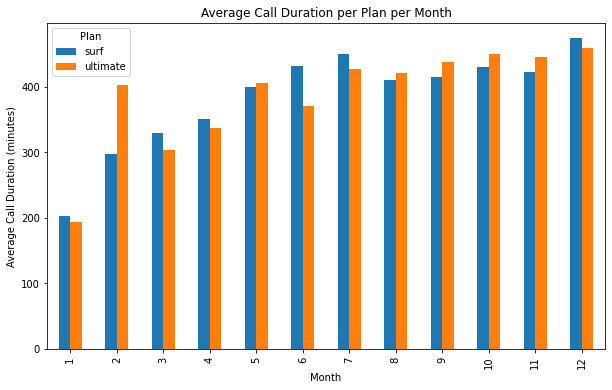

In [27]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

# Calculate the average duration of calls per plan per month
average_duration = merged_data.groupby(['plan', 'month'])['duration'].mean().unstack(level=0)

# Plot the bar plot
average_duration.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.title('Average Call Duration per Plan per Month')
plt.legend(title='Plan')
plt.show()

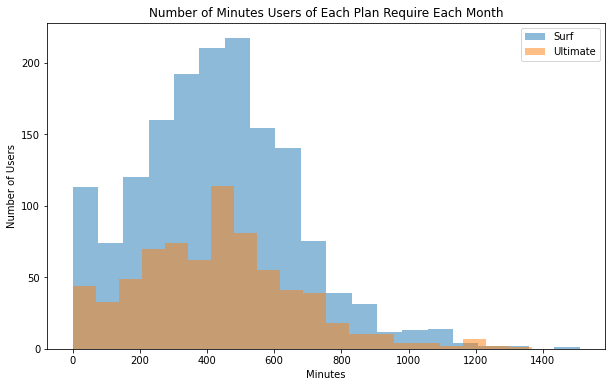

In [28]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
# Filter the data for each plan
surf_data = merged_data[merged_data['plan'] == 'surf']['duration']
ultimate_data = merged_data[merged_data['plan'] == 'ultimate']['duration']

# Plot the histograms
plt.figure(figsize=(10, 6))
plt.hist(surf_data, bins=20, alpha=0.5, label='Surf')
plt.hist(ultimate_data, bins=20, alpha=0.5, label='Ultimate')
plt.xlabel('Minutes')
plt.ylabel('Number of Users')
plt.title('Number of Minutes Users of Each Plan Require Each Month')
plt.legend()
plt.show()


In [29]:
# Calculate the mean and the variance of the monthly call duration
# Calculate the mean and variance for the 'Surf' plan
surf_mean = merged_data[merged_data['plan'] == 'surf']['duration'].mean()
surf_variance = merged_data[merged_data['plan'] == 'surf']['duration'].var()

# Calculate the mean and variance for the 'Ultimate' plan
ultimate_mean = merged_data[merged_data['plan'] == 'ultimate']['duration'].mean()
ultimate_variance = merged_data[merged_data['plan'] == 'ultimate']['duration'].var()

print("Surf Plan: Mean = ", surf_mean, ", Variance = ", surf_variance)
print("Ultimate Plan: Mean = ", ultimate_mean, ", Variance = ", ultimate_variance)


Surf Plan: Mean =  428.7495232040687 , Variance =  54968.27946065038
Ultimate Plan: Mean =  430.45 , Variance =  57844.46481223922


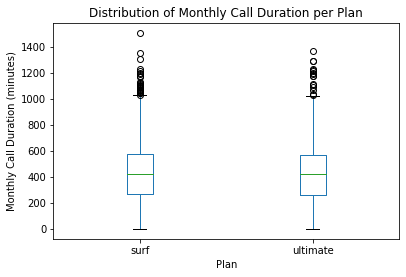

In [30]:
# Plot a boxplot to visualize the distribution of the monthly call duration
merged_data.boxplot(column='duration', by='plan', grid=False)
plt.xlabel('Plan')
plt.ylabel('Monthly Call Duration (minutes)')
plt.title('Distribution of Monthly Call Duration per Plan')
plt.suptitle('')  # Gets rid of the extra title
plt.show()


They seem to pretty much be the same when looking at the boxplot. It just seems that the surf plan has more outliers.

### Messages

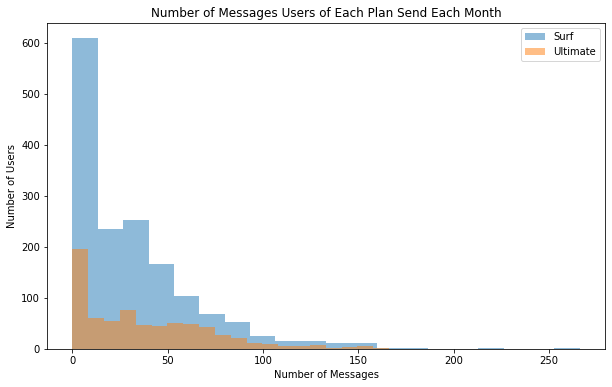

In [31]:
# Compare the number of messages users of each plan tend to send each month
# Filter the data for each plan
surf_data = merged_data[merged_data['plan'] == 'surf']['message_date']
ultimate_data = merged_data[merged_data['plan'] == 'ultimate']['message_date']

# Plot the histograms
plt.figure(figsize=(10, 6))
plt.hist(surf_data, bins=20, alpha=0.5, label='Surf')
plt.hist(ultimate_data, bins=20, alpha=0.5, label='Ultimate')
plt.xlabel('Number of Messages')
plt.ylabel('Number of Users')
plt.title('Number of Messages Users of Each Plan Send Each Month')
plt.legend()
plt.show()


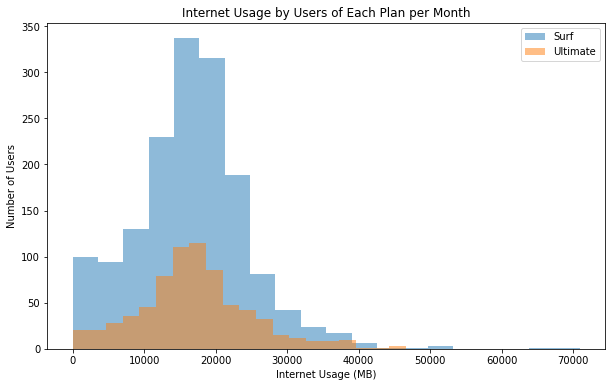

In [32]:
# Compare the amount of internet traffic consumed by users per plan
# Filter the data for each plan
surf_data = merged_data[merged_data['plan'] == 'surf']['mb_used']
ultimate_data = merged_data[merged_data['plan'] == 'ultimate']['mb_used']

# Plot the histograms
plt.figure(figsize=(10, 6))
plt.hist(surf_data, bins=20, alpha=0.5, label='Surf')
plt.hist(ultimate_data, bins=20, alpha=0.5, label='Ultimate')
plt.xlabel('Internet Usage (MB)')
plt.ylabel('Number of Users')
plt.title('Internet Usage by Users of Each Plan per Month')
plt.legend()
plt.show()


In [33]:
# Calculate the mean and variance for the 'Surf' plan
surf_mean = merged_data[merged_data['plan'] == 'surf']['message_date'].mean()
surf_variance = merged_data[merged_data['plan'] == 'surf']['message_date'].var()

# Calculate the mean and variance for the 'Ultimate' plan
ultimate_mean = merged_data[merged_data['plan'] == 'ultimate']['message_date'].mean()
ultimate_variance = merged_data[merged_data['plan'] == 'ultimate']['message_date'].var()

print("Surf Plan: Mean = ", surf_mean, ", Variance = ", surf_variance)
print("Ultimate Plan: Mean = ", ultimate_mean, ", Variance = ", ultimate_variance)

Surf Plan: Mean =  31.15956770502225 , Variance =  1126.7245219504068
Ultimate Plan: Mean =  37.55138888888889 , Variance =  1208.7567435481378


On average, more people send text messages under the ultimate plan, but that may be because the ultimate plan includes 1000 messages without paying more. There is also a higher variance with the ultimate plan. Not everyone needs to use all 1000 messages.

 

### Internet

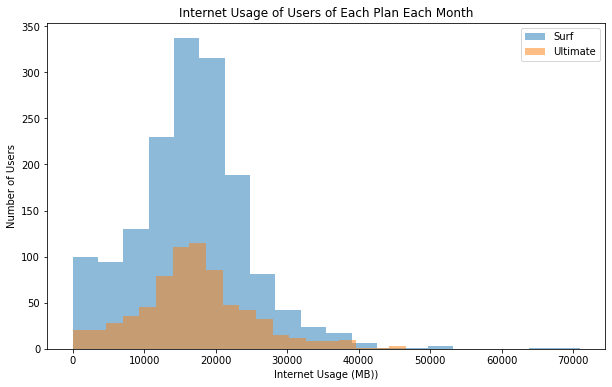

In [34]:
# Compare the number of messages users of each plan tend to send each month
# Filter the data for each plan
surf_data = merged_data[merged_data['plan'] == 'surf']['mb_used']
ultimate_data = merged_data[merged_data['plan'] == 'ultimate']['mb_used']

# Plot the histograms
plt.figure(figsize=(10, 6))
plt.hist(surf_data, bins=20, alpha=0.5, label='Surf')
plt.hist(ultimate_data, bins=20, alpha=0.5, label='Ultimate')
plt.xlabel('Internet Usage (MB))')
plt.ylabel('Number of Users')
plt.title('Internet Usage of Users of Each Plan Each Month')
plt.legend()
plt.show()

In [35]:
# Calculate the mean and variance for the 'Surf' plan
surf_mean = merged_data[merged_data['plan'] == 'surf']['mb_used'].mean()
surf_variance = merged_data[merged_data['plan'] == 'surf']['mb_used'].var()

# Calculate the mean and variance for the 'Ultimate' plan
ultimate_mean = merged_data[merged_data['plan'] == 'ultimate']['mb_used'].mean()
ultimate_variance = merged_data[merged_data['plan'] == 'ultimate']['mb_used'].var()

print("Surf Plan: Mean = ", surf_mean, ", Variance = ", surf_variance)
print("Ultimate Plan: Mean = ", ultimate_mean, ", Variance = ", ultimate_variance)

Surf Plan: Mean =  16558.283490146216 , Variance =  64216395.838027954
Ultimate Plan: Mean =  17214.699694444444 , Variance =  61652293.32385832


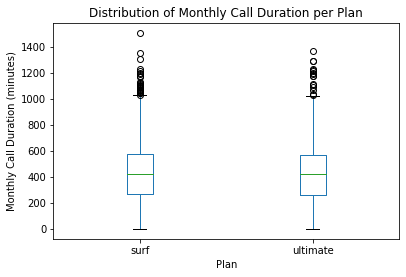

In [36]:
merged_data.boxplot(column='duration', by='plan', grid=False)
plt.xlabel('Plan')
plt.ylabel('Monthly Call Duration (minutes)')
plt.title('Distribution of Monthly Call Duration per Plan')
plt.suptitle('')  # Gets rid of the extra title
plt.show()

On average, users under the ultimate plan only use slightly more than the users under the surf plan. Most surf users tend to utilize most or all of their plans allowance and may even go over and they may gladly pay slightly more on some months when they do go over their allowance. There's more variance with the surf users than there are with the ultimate users.

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [37]:
# Calculate the mean, median, and standard deviation of the total monthly charge for each plan
surf_revenue = merged_data[merged_data['plan'] == 'surf']['total_monthly_charge']
ultimate_revenue = merged_data[merged_data['plan'] == 'ultimate']['total_monthly_charge']

print("Surf Plan:\nMean: ", 
      surf_revenue.mean(), 
      "\nMedian: ", 
      surf_revenue.median(), 
      "\nStandard Deviation: ", 
      surf_revenue.std())
print("\nUltimate Plan:\nMean: ", 
      ultimate_revenue.mean(), 
      "\nMedian: ", 
      ultimate_revenue.median(), 
      "\nStandard Deviation: ", 
      ultimate_revenue.std())


Surf Plan:
Mean:  60.706408137317226 
Median:  40.36 
Standard Deviation:  55.388041600095214

Ultimate Plan:
Mean:  72.31388888888888 
Median:  70.0 
Standard Deviation:  11.395107965742119


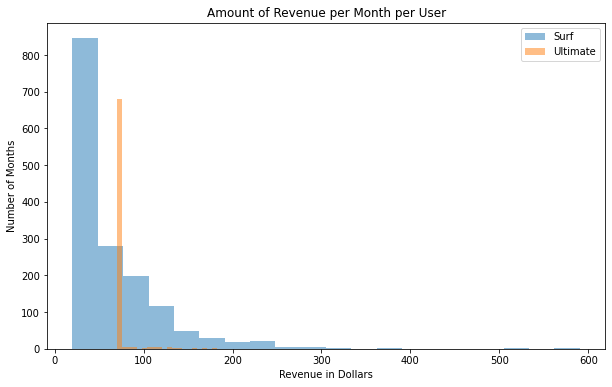

In [38]:
# Plot the histograms
plt.figure(figsize=(10, 6))
plt.hist(surf_revenue, bins=20, alpha=0.5, label='Surf')
plt.hist(ultimate_revenue, bins=20, alpha=0.5, label='Ultimate')
plt.xlabel('Revenue in Dollars')
plt.ylabel('Number of Months')
plt.title('Amount of Revenue per Month per User')
plt.legend()
plt.show()

Most users stay within the cost of the plans. Though more users in the surf plan tend to go over their plan's limits and add to their cost compared to users in the ultimate plan. A large majority of the ultimate plan users keep their usage within their allowance. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice graphs and good conclusions!
    
Pro tip: we can add boxplot without outliers to get more insights.
</div>

## Test statistical hypotheses

*Null Hypothesis:* The average revenue from users of the Ultimate and Surf calling plans is the same.

*Alternative Hypothesis:* The average revenue from users of the Ultimate and Surf calling plans differs.

Using 0.05 as alpha value.

In [39]:
# Test the hypotheses


# Filter the total monthly charge for each plan
surf_revenue = merged_data[merged_data['plan'] == 'surf']['total_monthly_charge']
ultimate_revenue = merged_data[merged_data['plan'] == 'ultimate']['total_monthly_charge']

# Perform the t-test
t_stat, p_value = st.ttest_ind(surf_revenue, ultimate_revenue)

print("t-statistic: ", t_stat)
print("p-value: ", p_value)


t-statistic:  -5.568949166552807
p-value:  2.862674510698644e-08


Having a t-statistic of -5.57 shows a significant difference between the two means. The mean of first plan (surf) is smaller than the mean of the second plan (ultimate). The p-value (2.86e-08) is much smaller than the alpha (0.05). If the null hypothesis is true, then the probability of seeing a large difference between the means is extremely low.

We can reject the null hypothesis and conclude that the average revenue from users of the Ultimate and Surf calling plans differs significantly. Specifically, the average revenue from users of the Ultimate plan is higher than that from users of the Surf plan. This suggests that the Ultimate plan is more profitable for the company.

Null Hypothesis: The average revenue from users in the NY-NJ area is the same as that of the users from other regions.

Alternative Hypothesis: The average revenue from users in the NY-NJ area is different from that of the users from other regions.

Using 0.05 as alpha value.

In [40]:
# Test the hypotheses
# Filter the total monthly charge for users in the NY-NJ area and other regions
ny_nj_revenue = merged_data[merged_data['city'].str.contains('NY-NJ')]['total_monthly_charge']
other_revenue = merged_data[~merged_data['city'].str.contains('NY-NJ')]['total_monthly_charge']

# Perform the t-test
t_stat, p_value = st.ttest_ind(ny_nj_revenue, other_revenue)

print("t-statistic: ", t_stat)
print("p-value: ", p_value)


t-statistic:  -2.0194429818968076
p-value:  0.04355743162134274


Given that the p-value is less than the alpha value of 0.05, we reject the null hypothesis. This suggests that the average revenue from users in the NY-NJ area is significantly different from that of the users from other regions.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

## General conclusion

The analysis provided valuable insights into user behavior and the profitability of the plans. It was found that the Ultimate plan is more profitable for the company, and that there is a difference in average revenue between users in the NY-NJ area and users from other regions. These findings can help the company make informed decisions about their marketing and pricing strategies.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good final conclusion.
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

Jester, thank you for sending your project. You've done a really good job on it!
    
Especially impressed:

- deep detailed conclusions
    
- good graphs
    
- high code level

- good project structure
    
    
Thank you for in-depth analysis and logical conclusions!
    
I'm glad to say that your project has been accepted. Keep up the good work, and good luck on the next sprint!
</div>